In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x=pd.read_csv("COASTAL KARNATAKA.csv")


In [3]:
columns_to_drop = ["Unnamed: 0"]
data_clean = x.drop(columns_to_drop,axis = 1)
x = data_clean


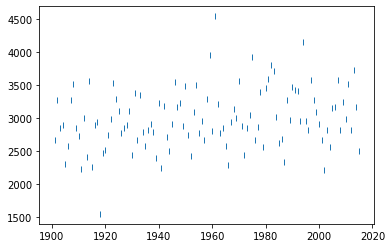

In [4]:
y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'|')
plt.show()

In [5]:
flood=[]
june=[]
sub=[]
#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))


#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#flood,rain,heavy rain
for i in range(0,len(x1)):
    if x1[i]>3000 or june[i] > 350 or sub[i] > 1100:
        flood.append('1')
    elif x1[i] < 1500  or june[i] < 30  or sub[i] < 50:
        flood.append('0')
    else:
        flood.append('-1')





df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      

           SUBDIVISION  YEAR       JAN   FEB    MAR    APR    MAY     JUN  \
0    COASTAL KARNATAKA  1901   1.80000   0.6   10.7   52.4   81.6   960.9   
1    COASTAL KARNATAKA  1902   3.20000   0.3    4.9   10.2   54.6   698.4   
2    COASTAL KARNATAKA  1903   0.70000   0.0    0.0    4.1  202.8   536.5   
3    COASTAL KARNATAKA  1904   2.40000   0.0    4.8   23.7   93.2  1108.2   
4    COASTAL KARNATAKA  1905   0.00000   0.2    0.0    6.4   83.1   767.3   
5    COASTAL KARNATAKA  1906  23.00000   0.0    0.0    0.5   29.8   593.6   
6    COASTAL KARNATAKA  1907   7.00000   0.0    2.7   91.3   19.0   845.9   
7    COASTAL KARNATAKA  1908   0.00000   3.1    0.9   46.1   38.0   708.6   
8    COASTAL KARNATAKA  1909   4.00000   1.0    3.7    6.3  200.1   943.1   
9    COASTAL KARNATAKA  1910   0.00000   0.0    5.0    6.2   40.2  1042.2   
10   COASTAL KARNATAKA  1911   0.00000   0.0    0.0    3.2   71.0   749.5   
11   COASTAL KARNATAKA  1912   1.10000   0.0    0.0   30.5   64.0   787.6   

In [6]:

import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1 or -1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING
X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [8]:
Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X_test,Y_test)) 


0.6896551724137931


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
np.unique(y1)

array(['-1', '1'], dtype=object)

In [10]:
import pickle
Pkl_Filename = "andhra pradesh.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(Lr, file)